In [65]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt

In [66]:
def canny_detector(img):
    canny = cv2.Canny(img, 50, 150)
    return canny


In [67]:
def sobel_detector(img):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
    sobel = np.where(sobel > 150, 255, 0)
    return sobel

In [68]:
def prewitt_detector(img):
    prewittx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    prewitty = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    prewitt = np.sqrt(np.square(prewittx) + np.square(prewitty))
    prewitt = np.where(prewitt > 150, 255, 0)
    return prewitt

In [69]:
def roberts_detector(img):
    robertsx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    robertsy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    roberts = np.abs(robertsx) + np.abs(robertsy)
    roberts = np.where(roberts > 150, 255, 0)
    return roberts

In [70]:

def GaussianBlur(img):
    GaussianBlur_ = cv2.GaussianBlur(img, (3,3), 0)
    return GaussianBlur_

In [71]:
def apply_edge_detectors(img):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle("Edge Detectors Comparison")
    axs = axs.ravel()

    # Canny Edge Detector
    canny = canny_detector(img)
    axs[0].imshow(canny, cmap='gray')
    axs[0].set_title("Canny Edge Detector")

    # Sobel Edge Detector
    sobel = sobel_detector(img)
    axs[1].imshow(sobel, cmap='gray')
    axs[1].set_title("Sobel Edge Detector")

    # Prewitt Edge Detector
    prewitt = prewitt_detector(img)
    axs[2].imshow(prewitt, cmap='gray')
    axs[2].set_title("Prewitt Edge Detector")

    # Roberts Edge Detector
    roberts = roberts_detector(img)
    axs[3].imshow(roberts, cmap='gray')
    axs[3].set_title("Roberts Edge Detector")

    # Laplacian of Gaussian
    GaussianBlur_ = GaussianBlur(img)
    axs[4].imshow(GaussianBlur_, cmap='gray')
    axs[4].set_title("GaussianBlur")
    
    axs[5].imshow(img, cmap='gray')
    axs[5].set_title("Noisy image")
    
    plt.show()

In [72]:
def create_image():
    # Create a 2D numpy array with half of its values 0 and half 255
    img = np.zeros((100, 100), dtype=np.uint8)
    img[:, :50] = 255
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.show()
    
    canny = cv2.Canny(img, 50, 150)
    plt.imshow(canny, cmap='gray')
    plt.title("Canny Edge Detector on Original Image")
    plt.show()

    return img

In [73]:

def add_gaussian_noise(image, mean=0, sigma=1):
    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

In [74]:
def compare_edge_detectors(img, ground_truth, edge_detectors):
    def pratt_figure_of_merit(tp, fp, fn):
        return (2 * tp) / (2 * tp + fp + fn)
    
    results = []
    for name, detector in edge_detectors.items():
        edges = detector(img)
        tp = np.sum(np.logical_and(edges > 0, ground_truth > 0))
        fp = np.sum(np.logical_and(edges > 0, ground_truth == 0))
        fn = np.sum(np.logical_and(edges == 0, ground_truth > 0))
        score = pratt_figure_of_merit(tp, fp, fn)
        results.append((name, score))
        
    return results

In [75]:
def fom(img, original, alpha  = 1.0 / 9):
    """
    Computing Pratt's Figure of Merit for the given image img.
    """
    
    # Compute the distance transform for the standard image.
    dist = distance_transform_edt(np.invert(original))

    fom = 1.0 / np.maximum(
        np.count_nonzero(img),
        np.count_nonzero(original))

    N, M = img.shape

    for i in range(0, N-2):
        for j in range(0, M-2):
            if (img[i, j]).any():
                fom += 1.0 / ( 1.0 + dist[i, j] * dist[i, j] * alpha)

    fom /= np.maximum(
        np.count_nonzero(img),
        np.count_nonzero(original))    

    return fom

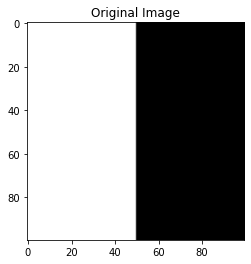

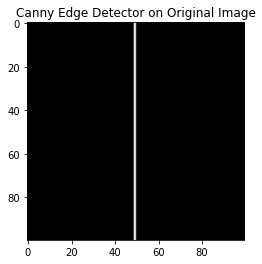

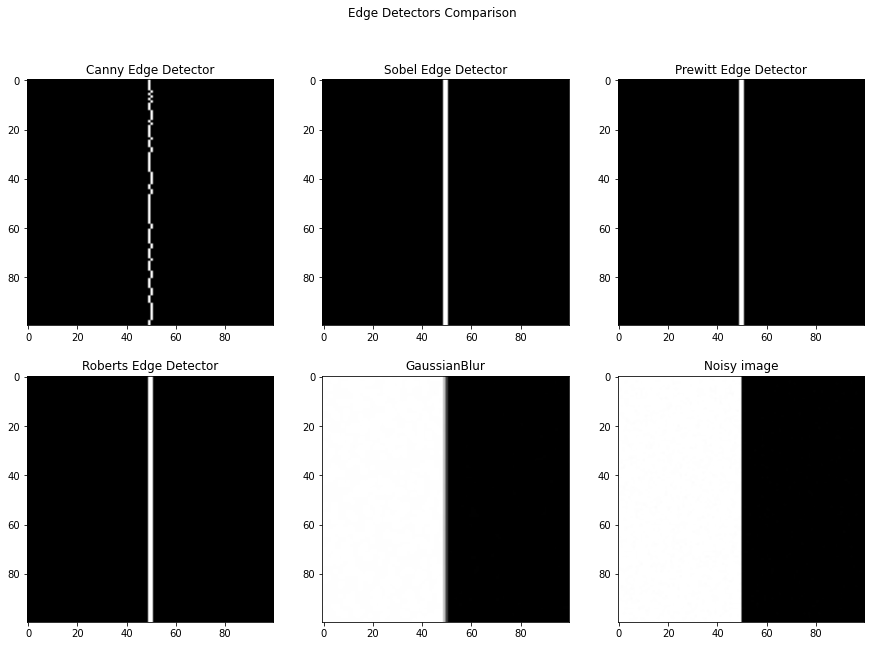

[('Canny', 0.64), ('Sobel', 0.6666666666666666), ('prewitt', 0.6666666666666666), ('roberts', 0.6666666666666666), ('GaussianBlur', 0.03595828838547285)]
################################################
Printing Result from the other PFOM function
When compared the Canny edge detector with the ground truth, the result of PFOM is:  0.9441000000000008
When compared the Sobel edge detector with the ground truth, the result of PFOM is:  0.9310250000000018
When compared the prewitt edge detector with the ground truth, the result of PFOM is:  0.9310250000000018
When compared the roberts edge detector with the ground truth, the result of PFOM is:  0.9310250000000018
When compared the GaussianBlur edge detector with the ground truth, the result of PFOM is:  0.11070745879402004


In [76]:
i = create_image()
noisy_image = add_gaussian_noise(i)
apply_edge_detectors(noisy_image)

edge_detectors = {
    'Canny': canny_detector,
    'Sobel': sobel_detector,
    'prewitt': prewitt_detector,
    'roberts': roberts_detector,
    'GaussianBlur': GaussianBlur,
}

ground_truth = cv2.Canny(i, 50, 150)
results = compare_edge_detectors(noisy_image, ground_truth, edge_detectors)
print(results)

print("################################################")
print("Printing Result from the other PFOM function")

canny = canny_detector(noisy_image)
print("When compared the Canny edge detector with the ground truth, the result of PFOM is: ", fom(canny, ground_truth))

sobel = sobel_detector(noisy_image)
print("When compared the Sobel edge detector with the ground truth, the result of PFOM is: ", fom(sobel, ground_truth))

prewitt = prewitt_detector(noisy_image)
print("When compared the prewitt edge detector with the ground truth, the result of PFOM is: ", fom(prewitt, ground_truth))

roberts = roberts_detector(noisy_image)
print("When compared the roberts edge detector with the ground truth, the result of PFOM is: ", fom(roberts, ground_truth))


GaussianBlur = GaussianBlur(noisy_image)
print("When compared the GaussianBlur edge detector with the ground truth, the result of PFOM is: ", fom(GaussianBlur, ground_truth))